# Setup

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!pip install sae_lens

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.1/920.1 kB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4

In [ ]:
!pip install Datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
from datasets import load_dataset

ds = load_dataset("google-research-datasets/go_emotions", "simplified")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [ ]:
from datasets import concatenate_datasets

ds = concatenate_datasets([ds['train'], ds['validation'], ds['test']])
ds

Dataset({
    features: ['text', 'labels', 'id'],
    num_rows: 54263
})

In [ ]:
label_names = ds.features["labels"].feature.names


In [ ]:
targeted_emotions = ['joy', 'anger', 'disgust', 'sadness', 'love', 'fear', 'excitement']
labels = []
for em in targeted_emotions:
  labels.append(label_names.index(em))

In [ ]:
ds = ds.filter(lambda x: any(label in labels for label in x['labels']))

Filter:   0%|          | 0/54263 [00:00<?, ? examples/s]

In [ ]:
ds = ds.filter(lambda x: len(x['labels']) == 1)

Filter:   0%|          | 0/10347 [00:00<?, ? examples/s]

In [ ]:
import numpy as np

ids = np.load("ds_filt.npy")

In [ ]:
filtered_ds = ds.filter(lambda x: x["id"] in ids)


Filter:   0%|          | 0/6887 [00:00<?, ? examples/s]

In [ ]:
ds = filtered_ds

In [ ]:
len(ds)

3037

In [ ]:
ds = ds['train']


In [ ]:
ds

Dataset({
    features: ['text', 'labels', 'id'],
    num_rows: 43410
})

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b")
#model = AutoModel.from_pretrained("google/gemma-2-2b", output_hidden_states=True)
#model.eval()


tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

In [ ]:
!pip install sae_lens

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.1/920.1 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate

In [ ]:
from sae_lens import (
    SAE,
    ActivationsStore,
    HookedSAETransformer,
    LanguageModelSAERunnerConfig,
    SAEConfig,
    SAETrainingRunner,
    upload_saes_to_huggingface,
)
from sae_lens.toolkit.pretrained_saes_directory import get_pretrained_saes_directory
#from sae_vis import SaeVisConfig, SaeVisData, SaeVisLayoutConfig

In [ ]:
def format_value(value):
    return "{{{0!r}: {1!r}, ...}}".format(*next(iter(value.items()))) if isinstance(value, dict) else repr(value)


release = get_pretrained_saes_directory()["gemma-scope-2b-pt-res"]

print(
    tabulate(
        [[k, format_value(v)] for k, v in release.__dict__.items()],
        headers=["Field", "Value"],
        tablefmt="simple_outline",
    )
)

┌────────────────────────┬─────────────────────────────────────────────────────────────────────────────┐
│ Field                  │ Value                                                                       │
├────────────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ release                │ 'gemma-scope-2b-pt-res'                                                     │
│ repo_id                │ 'google/gemma-scope-2b-pt-res'                                              │
│ model                  │ 'gemma-2-2b'                                                                │
│ conversion_func        │ 'gemma_2'                                                                   │
│ saes_map               │ {'embedding/width_4k/average_l0_6': 'embedding/width_4k/average_l0_6', ...} │
│ expected_var_explained │ {'embedding/width_4k/average_l0_6': 1.0, ...}                               │
│ expected_l0            │ {'embedding/width_4k/average

In [ ]:
data = [[id, path, release.neuronpedia_id[id]] for id, path in release.saes_map.items()]

print(
    tabulate(
        data,
        headers=["SAE id", "SAE path (HuggingFace)", "Neuronpedia ID"],
        tablefmt="simple_outline",
    )
)

┌────────────────────────────────────┬────────────────────────────────────┬──────────────────────────────────────────┐
│ SAE id                             │ SAE path (HuggingFace)             │ Neuronpedia ID                           │
├────────────────────────────────────┼────────────────────────────────────┼──────────────────────────────────────────┤
│ embedding/width_4k/average_l0_6    │ embedding/width_4k/average_l0_6    │                                          │
│ embedding/width_4k/average_l0_44   │ embedding/width_4k/average_l0_44   │                                          │
│ embedding/width_4k/average_l0_21   │ embedding/width_4k/average_l0_21   │                                          │
│ embedding/width_4k/average_l0_111  │ embedding/width_4k/average_l0_111  │                                          │
│ layer_0/width_16k/average_l0_105   │ layer_0/width_16k/average_l0_105   │                                          │
│ layer_0/width_16k/average_l0_13    │ layer_0/w

# Collecting activations

In [ ]:
texts = [item["text"] for item in ds]
labels = [item["labels"] for item in ds]


In [ ]:
import torch
from sae_lens import SAE, ActivationsStore

device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
torch.set_grad_enabled(False)

gemma_sae, cfg_dict, sparsity = SAE.from_pretrained(
    release="gemma-scope-2b-pt-res",
    sae_id="layer_20/width_16k/average_l0_71",
    device=str(device),
)

gemma = HookedSAETransformer.from_pretrained("google/gemma-2-2b", device=device)


params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/818 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/481M [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

Loaded pretrained model google/gemma-2-2b into HookedTransformer


In [ ]:
label_names = load_dataset("go_emotions", "simplified", split="train").features["labels"].feature.names
#sad_id = label_names.index("sadness")

README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [ ]:
targeted_emotions = ['joy', 'anger', 'disgust', 'sadness']
labels = []
for em in targeted_emotions:
  labels.append(label_names.index(em))

In [ ]:
ds_reduced = ds.filter(lambda x: any(label in labels for label in x['labels']))

In [ ]:
texts = [item['text'] for item in ds_reduced ]
labels = [item['labels'] for item in ds_reduced ]

In [ ]:
#just to measure length
lengths = [len(tokenizer.encode(text)) for text in texts]
max_length = max(lengths)
print(f"Max tokenized length across all samples: {max_length}")


Max tokenized length across all samples: 40


In [ ]:
from tqdm import tqdm
import torch
import gc

batch_size = 4
max_length = 52
results = []

for i in tqdm(range(0, len(texts), batch_size), desc="Processing batches"):
    try:
        gc.collect()
        torch.cuda.empty_cache()

        # Get batch
        batch_texts = texts[i:i + batch_size]

        # Tokenize
        tokenized = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_length
        )
        input_ids = tokenized["input_ids"].to(device)

        # Forward pass with SAE and cache activations
        _, cache = gemma.run_with_cache_with_saes(
            input_ids,
            saes=[gemma_sae],
            stop_at_layer=gemma_sae.cfg.hook_layer + 1,
            names_filter=[f"{gemma_sae.cfg.hook_name}.hook_sae_acts_post"],
        )

        # SAE activations (features)
        sae_acts = cache[f"{gemma_sae.cfg.hook_name}.hook_sae_acts_post"]  # [B, T, F]
        final_acts = sae_acts[:, -1, :].detach().cpu()

        # Sparsity = number of active features
        sparsity = (sae_acts[:, -1, :] > 1).sum(dim=-1)  # [B]

        decoded_tokens = [tokenizer.convert_ids_to_tokens(ids) for ids in input_ids]


        for i in range(len(batch_texts)):
            results.append({
                "input_ids": input_ids[i].detach().cpu(),              # torch.Tensor
                "tokens": decoded_tokens[i],                          # list of strings
                "activation": final_acts[i],                          # torch.Tensor
                "sparsity": int(sparsity[i]),                         # int
            })

        # Cleanup
        del cache, sae_acts, final_acts, sparsity, input_ids, tokenized
        torch.cuda.empty_cache()

    except RuntimeError as e:
        print(f"⚠️ OOM on batch {i}-{i+batch_size}: {e}")
        torch.cuda.empty_cache()


Processing batches: 100%|██████████| 760/760 [05:40<00:00,  2.23it/s]


In [ ]:
import pickle

with open("sae_results_filtered.pkl", "wb") as f:
    pickle.dump(results, f)


In [ ]:
print("Average sparsity:", torch.tensor([r["sparsity"] for r in results]).float().mean())


Average sparsity: tensor(70.9389)


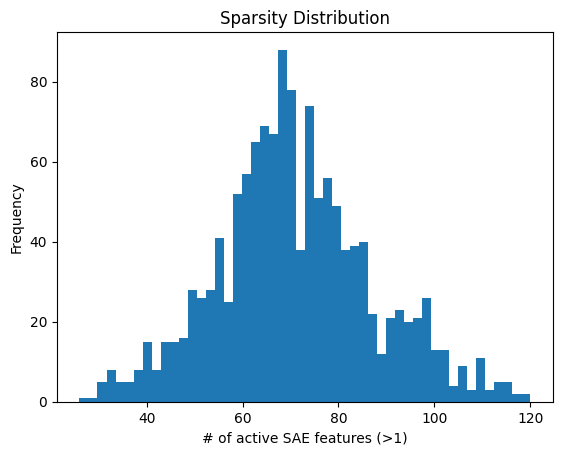

In [ ]:
import matplotlib.pyplot as plt

sparsities = [r["sparsity"] for r in results]
plt.hist(sparsities, bins=50)
plt.title("Sparsity Distribution")
plt.xlabel("# of active SAE features (>1)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
topk = results[0]["activation"].topk(10)

top_neurons = topk.indices.tolist()
top_values = topk.values.tolist()

print(f"Top firing SAE neurons and their activations for input:{results[0]['text']}")
for idx, val in zip(top_neurons, top_values):
    print(f"Neuron {idx} ➝ Activation: {val:.4f}")


Top firing SAE neurons and their activations for input:I miss them being alive
Neuron 15509 ➝ Activation: 47.4543
Neuron 4326 ➝ Activation: 35.8033
Neuron 14232 ➝ Activation: 34.3398
Neuron 204 ➝ Activation: 29.5415
Neuron 15328 ➝ Activation: 27.9000
Neuron 11864 ➝ Activation: 26.3788
Neuron 1692 ➝ Activation: 26.2759
Neuron 9768 ➝ Activation: 25.3538
Neuron 15539 ➝ Activation: 23.9061
Neuron 14084 ➝ Activation: 23.6004


In [ ]:
inds = []

for i, entry in enumerate(results):
    text = entry["text"]
    activation = entry["activation"]

    val, idx = activation.max(-1)
    inds.append(idx)


In [ ]:
import plotly.express as px
import torch

sample = results[0]

activation = sample["activation"]
activation_np = activation.numpy()

px.line(
    y=activation_np,
    title=f"SAE Activations for Sample 0 — Final Token",
    labels={"index": "Neuron (Latent Feature)", "value": "Activation"},
    width=1000
).update_layout(showlegend=False).show()


# Drafts

In [ ]:
results = [
    {
        "text": decoded_prompts[i],
        "activation": final_acts[i].detach().cpu()
    }
    for i in range(len(texts))
]


In [ ]:
'''
inappropriate as it will concatenate differently labeled text into one chunk

from transformer_lens.utils import tokenize_and_concatenate

token_dataset = tokenize_and_concatenate(
    dataset=ds,  # type: ignore
    tokenizer=tokenizer,  # type: ignore
    streaming=True,
    max_length=gemma_sae.cfg.context_size,
    add_bos_token=gemma_sae.cfg.prepend_bos,
)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_dataset
from sae_lens import SAE, ActivationsStore
from transformer_lens.utils import tokenize_and_concatenate
from transformers import AutoTokenizer
from torch.nn.utils.rnn import pad_sequence
import torch
'''
tokenized_ds = tokenize_and_concatenate(
    dataset=ds.remove_columns([col for col in ds.column_names if col != "text"]),
    tokenizer=tokenizer,
    column_name="text",
    streaming=False,
    max_length=gemma_sae.cfg.context_size,
    add_bos_token=gemma_sae.cfg.prepend_bos,
)
'''

# Collect activations
batch_size = 2
all_acts, all_labels = [], []

for i in range(0, len(tokenized_ds), batch_size):
    batch = tokenized_ds.select(range(i, min(i + batch_size, len(tokenized_ds))))
    tokens = batch["tokens"]  # ✅ This is now a list of LongTensors
    input_ids = pad_sequence(tokens, batch_first=True, padding_value=tokenizer.pad_token_id).to(device)

    try:
        _, cache = gemma.run_with_cache_with_saes(
            input_ids,
            saes=[gemma_sae],
            stop_at_layer=gemma_sae.cfg.hook_layer + 1,
        )
        sae_acts = cache[f"{gemma_sae.cfg.hook_name}.hook_sae_acts_post"]
        final_acts = sae_acts[:, -1, :].detach().cpu()

        all_acts.append(final_acts)
        all_labels.extend(labels[i:i + len(tokens)])

        del cache, sae_acts, final_acts, input_ids
        torch.cuda.empty_cache()

    except RuntimeError as e:
        print(f"Skipping batch {i}-{i+batch_size} due to OOM: {e}")
        torch.cuda.empty_cache()




In [ ]:
pip install ace_tools

In [ ]:
X = torch.cat(all_acts, dim=0)
y = all_labels

label_to_acts = defaultdict(list)
for xi, yi in zip(X, y):
    for label in yi:
        label_to_acts[label].append(xi)

label_to_mean = {label: torch.stack(acts).mean(dim=0) for label, acts in label_to_acts.items()}

# Output as DataFrame
import pandas as pd
df_mean = pd.DataFrame.from_dict({k: v.numpy() for k, v in label_to_mean.items()}, orient="index")

display(df_mean)

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
27,0.0,0.0,0.0,0.0,0.0,2.821976,8.445790,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,8.378258,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.000000,6.378332,0.0,0.0,0.0,...,0.0,0.0,0.0,5.262808,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
top_k = 10
emotion_to_top_neurons = {}

for label, mean_acts in label_to_mean.items():
    top_values, top_indices = mean_acts.topk(top_k)
    emotion_to_top_neurons[label] = list(zip(top_indices.tolist(), top_values.tolist()))

# Convert to readable DataFrame
emotion_top_df = pd.DataFrame.from_dict(emotion_to_top_neurons, orient="index")
emotion_top_df.columns = [f"TOP {i+1} Neuron" for i in range(top_k)]


In [ ]:
emotion_top_df

,TOP 1 Neuron,TOP 2 Neuron,TOP 3 Neuron,TOP 4 Neuron,TOP 5 Neuron,TOP 6 Neuron,TOP 7 Neuron,TOP 8 Neuron,TOP 9 Neuron,TOP 10 Neuron
27,"(13266, 80.72550964355469)","(902, 70.68244934082031)","(2725, 42.50198745727539)","(10628, 35.10977554321289)","(4692, 29.095422744750977)","(9938, 26.394330978393555)","(4296, 21.394487380981445)","(8639, 18.453447341918945)","(7290, 18.40570640563965)","(2498, 18.3316707611084)"
2,"(8693, 84.09520721435547)","(15980, 34.53671646118164)","(13663, 20.850183486938477)","(12715, 18.82718276977539)","(2725, 16.9785213470459)","(2593, 14.95749282836914)","(10628, 14.621419906616211)","(8728, 14.092205047607422)","(12305, 13.411565780639648)","(5958, 13.392799377441406)"
14,"(13266, 56.38093566894531)","(12547, 52.351280212402344)","(2414, 44.86003494262695)","(10628, 39.48875427246094)","(902, 35.5126838684082)","(4692, 25.841344833374023)","(4402, 23.980873107910156)","(8932, 23.758363723754883)","(6740, 22.883298873901367)","(4632, 21.39198875427246)"
3,"(13266, 81.29066467285156)","(902, 69.83061218261719)","(15608, 57.727996826171875)","(10628, 54.46266174316406)","(2725, 32.740970611572266)","(8011, 26.581457138061523)","(11535, 25.561491012573242)","(8343, 23.034547805786133)","(13805, 22.64829444885254)","(13524, 21.018497467041016)"
26,"(13266, 87.129638671875)","(4484, 61.755577087402344)","(259, 53.257347106933594)","(192, 42.615623474121094)","(902, 39.16461181640625)","(4743, 39.02922821044922)","(15664, 36.719993591308594)","(8435, 31.537580490112305)","(10628, 30.200536727905273)","(14980, 29.40370750427246)"
15,"(12018, 96.6207275390625)","(5118, 56.015586853027344)","(902, 52.16383361816406)","(13266, 49.9786376953125)","(10628, 41.85191345214844)","(4692, 34.110206604003906)","(2725, 33.77613067626953)","(14699, 27.506694793701172)","(11108, 19.8228759765625)","(281, 19.531536102294922)"
8,"(4692, 63.472835540771484)","(902, 52.36396789550781)","(13033, 50.78866958618164)","(13266, 44.48841857910156)","(12574, 41.757972717285156)","(10628, 39.89073181152344)","(16012, 36.19258117675781)","(2725, 35.08106994628906)","(9101, 33.243377685546875)","(4471, 27.653057098388672)"
20,"(4692, 63.472835540771484)","(902, 52.36396789550781)","(13033, 50.78866958618164)","(13266, 44.48841857910156)","(12574, 41.757972717285156)","(10628, 39.89073181152344)","(16012, 36.19258117675781)","(2725, 35.08106994628906)","(9101, 33.243377685546875)","(4471, 27.653057098388672)"
0,"(13266, 88.88894653320312)","(902, 68.71773529052734)","(8639, 56.62751007080078)","(7290, 54.06526184082031)","(7014, 44.0433464050293)","(12835, 40.97573471069336)","(2725, 37.85867691040039)","(10628, 33.8073616027832)","(11883, 29.760787963867188)","(4692, 28.618066787719727)"


In [ ]:
from sae_lens.analysis.neuronpedia_integration import get_neuronpedia_quick_list

# this function should open
neuronpedia_quick_list = get_neuronpedia_quick_list(gemma_sae, test_feature_idx_gpt)

if COLAB:
    # If you're on colab, click the link below
    print(neuronpedia_quick_list)

NameError: name 'test_feature_idx_gpt' is not defined

In [ ]:
from collections import defaultdict

label_to_acts = defaultdict(list)
for xi, yi in zip(X, y):
    label_to_acts[yi].append(xi)

label_to_mean = {label: torch.stack(acts).mean(dim=0) for label, acts in label_to_acts.items()}


TypeError: unhashable type: 'list'

In [ ]:
from sae_lens.analysis.neuronpedia_integration import
# Example: interpret neuron 1234 from your SAE
neuron_id = 1234
interpretation = neuronpedia.analyze_feature(
    feature_idx=neuron_id,
    sae=gemma_sae,
    model=gemma,
    top_k=15  # get top associated tokens or completions
)

ImportError: cannot import name 'neuronpedia' from 'sae_lens.analysis' (/usr/local/lib/python3.11/dist-packages/sae_lens/analysis/__init__.py)

In [ ]:
for name, param in cache.items():
    if "hook_sae" in name:
        print(f"{name:<43}: {tuple(param.shape)}")

blocks.19.hook_resid_post.hook_sae_input   : (1, 14, 2304)
blocks.19.hook_resid_post.hook_sae_acts_pre: (1, 14, 16384)
blocks.19.hook_resid_post.hook_sae_acts_post: (1, 14, 16384)
blocks.19.hook_resid_post.hook_sae_recons  : (1, 14, 2304)
blocks.19.hook_resid_post.hook_sae_output  : (1, 14, 2304)


In [ ]:
import plotly.express as px

In [ ]:
# Plot line chart of latent activations
px.line(
    sae_acts_post.cpu().numpy(),
    title=f"Latent activations at the final token position ({sae_acts_post.nonzero().numel()} alive)",
    labels={"index": "Latent", "value": "Activation"},
    width=1000,
).update_layout(showlegend=False).show()

# Print the top 5 latents, and inspect their dashboards
for act, ind in zip(*sae_acts_post.topk(3)):
    print(f"Latent {ind} had activation {act:.2f}")
    display_dashboard(latent_idx=ind)

Latent 13266 had activation 71.63


NameError: name 'display_dashboard' is not defined

In [ ]:
sae_acts_post_hook_name = f"{gemma_sae.cfg.hook_name}.hook_sae_acts_post"
all_positive_acts = []

for i in tqdm(range(total_batches)):
        tokens = act_store.get_batch_tokens()
        _, cache = model.run_with_cache_with_saes(
            tokens,
            saes=[gemma_sae],
            stop_at_layer=gemma_sae.cfg.hook_layer + 1,
            names_filter=[sae_acts_post_hook_name],
        )
        acts = cache[sae_acts_post_hook_name][..., latent_idx]
        all_positive_acts.extend(acts[acts > 0].cpu().tolist())

RuntimeError: The size of tensor a (16384) must match the size of tensor b (2304) at non-singleton dimension 0

### Neuronopedia

In [ ]:
results[0]

{'text': 'I miss them being alive',
 'activation': tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 'sparsity': 189}

In [ ]:
sae_release = "gemma-2-2b"
sae_id = "19-gemmascope-res-16k"
feature_idx = 11882  # example neuron

url = f"https://neuronpedia.org/{sae_release}/{sae_id}/{feature_idx}"

In [ ]:
for neuron in top_neurons:
    print(f"Neuron {neuron} ➝ https://neuronpedia.org/gemma-2-2b/19-gemmascope-res-16k__l0-137/2725")


In [ ]:
from IPython.display import IFrame

IFrame("https://neuronpedia.org/gemma-2-2b/19-gemmascope-res-16k__l0-137/2725", width=1200, height=600)


In [ ]:
Top firing SAE neurons and their activations for input:I miss them being alive
Neuron 15509 ➝ Activation: 47.4543
Neuron 4326 ➝ Activation: 35.8033
Neuron 14232 ➝ Activation: 34.3398
Neuron 204 ➝ Activation: 29.5415
Neuron 15328 ➝ Activation: 27.9000
Neuron 11864 ➝ Activation: 26.3788
Neuron 1692 ➝ Activation: 26.2759
Neuron 9768 ➝ Activation: 25.3538
Neuron 15539 ➝ Activation: 23.9061
Neuron 14084 ➝ Activation: 23.6004

In [ ]:
# for layer 20 from gemma scope tutorial


from IPython.display import IFrame
html_template = "https://neuronpedia.org/{}/{}/{}?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300"

def get_dashboard_html(sae_release = "gemma-2-2b", sae_id="20-gemmascope-res-16k", feature_idx=0):
    return html_template.format(sae_release, sae_id, feature_idx)

html = get_dashboard_html(sae_release = "gemma-2-2b", sae_id="20-gemmascope-res-16k", feature_idx=15539)
IFrame(html, width=1200, height=600)

In [ ]:
def fetch_max_activating_examples(
    model: HookedSAETransformer,
    sae: SAE,
    act_store: ActivationsStore,
    latent_idx: int,
    total_batches: int = 100,
    k: int = 10,
    buffer: int = 10,
    display: bool = False,
) -> list[tuple[float, list[str], int]]:
    """
    Displays the max activating examples across a number of batches from the
    activations store, using the `display_top_seqs` function.
    """
    sae_acts_post_hook_name = f"{sae.cfg.hook_name}.hook_sae_acts_post"

    # Create list to store the top k activations for each batch. Once we're done,
    # we'll filter this to only contain the top k over all batches
    data = []

    for _ in tqdm(range(total_batches)):
        tokens = act_store.get_batch_tokens()
        _, cache = model.run_with_cache_with_saes(
            tokens,
            saes=[sae],
            stop_at_layer=sae.cfg.hook_layer + 1,
            names_filter=[sae_acts_post_hook_name],
        )
        acts = cache[sae_acts_post_hook_name][..., latent_idx]

        # Get largest indices, get the corresponding max acts, and get the surrounding indices
        k_largest_indices = get_k_largest_indices(acts, k=k, buffer=buffer)
        tokens_with_buffer = index_with_buffer(tokens, k_largest_indices, buffer=buffer)
        str_toks = [model.to_str_tokens(toks) for toks in tokens_with_buffer]
        top_acts = index_with_buffer(acts, k_largest_indices).tolist()
        data.extend(list(zip(top_acts, str_toks, [buffer] * len(str_toks))))

    data = sorted(data, key=lambda x: x[0], reverse=True)[:k]
    if display:
        display_top_seqs(data)
    return data


# Display your results, and also test them
buffer = 10
data = fetch_max_activating_examples(gpt2, gpt2_sae, gpt2_act_store, latent_idx=9, buffer=buffer, k=5, display=True)
first_seq_str_tokens = data[0][1]
assert first_seq_str_tokens[buffer] == " new"